In [90]:
#Importing all necessary modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.proportion import binom_test
from scipy.stats import ttest_1samp
import matplotlib.cm as cm

In [233]:
#Loading the data

life_exp = pd.read_csv('all_data.csv')
life_exp.GDP = life_exp.GDP*(10**-9)

In [8]:
life_exp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [10]:
life_exp.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [12]:
life_exp.Year.value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

In [14]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


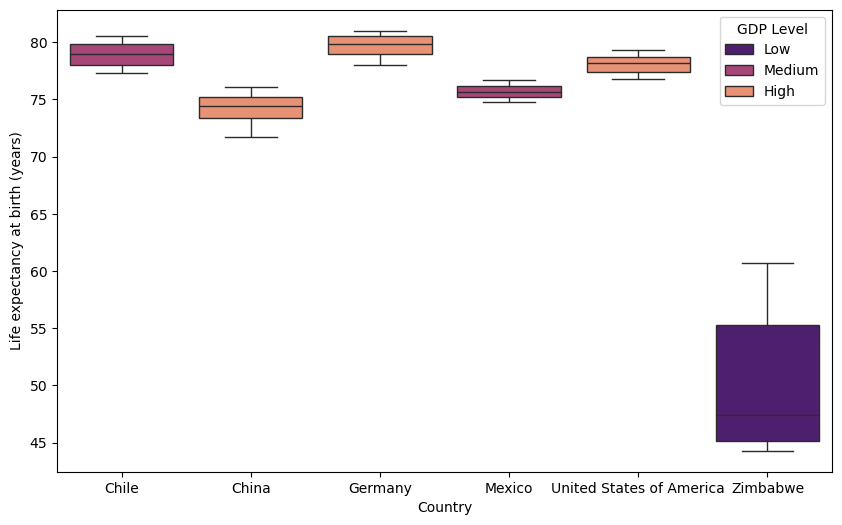

In [255]:
plt.figure(figsize= (10, 6))
sns.boxplot(x = life_exp.Country, y = life_exp['Life expectancy at birth (years)'], hue = life_exp.mean_GDP, palette = 'magma')
plt.legend(title = 'GDP Level')
plt.show()
plt.close()

In [235]:
# Categorize GDP based on values
total_gdp = life_exp.groupby('Country')['GDP'].mean().reset_index()
total_gdp.rename(columns = {'GDP': 'mean_GDP'}, inplace = True)
life_exp = life_exp.merge(total_gdp, on = 'Country')

In [237]:
# Categorize GDP into low, medium, high 
bins = [0, 100, 1000, 20000]
labels = ['Low', 'Medium', 'High']
life_exp.mean_GDP = pd.cut(life_exp.mean_GDP, bins = bins, labels = labels)

In [215]:
print(life_exp)

     Country  Year  Life expectancy at birth (years)        GDP  mean_GDP_x  \
0      Chile  2000                              77.3  77.860932  169.788845   
1      Chile  2001                              77.3  70.979924  169.788845   
2      Chile  2002                              77.8  69.736811  169.788845   
3      Chile  2003                              77.9  75.643460  169.788845   
4      Chile  2004                              78.0  99.210393  169.788845   
..       ...   ...                               ...        ...         ...   
91  Zimbabwe  2011                              54.9  12.098451    9.062580   
92  Zimbabwe  2012                              56.6  14.242490    9.062580   
93  Zimbabwe  2013                              58.0  15.451769    9.062580   
94  Zimbabwe  2014                              59.2  15.891049    9.062580   
95  Zimbabwe  2015                              60.7  16.304668    9.062580   

    mean_GDP_y mean_GDP  
0   169.788845   medium  

In [191]:
# Sort countries by GDP in descending order and get the list

sorted_countries = total_gdp.sort_values(ascending=False).index.tolist()

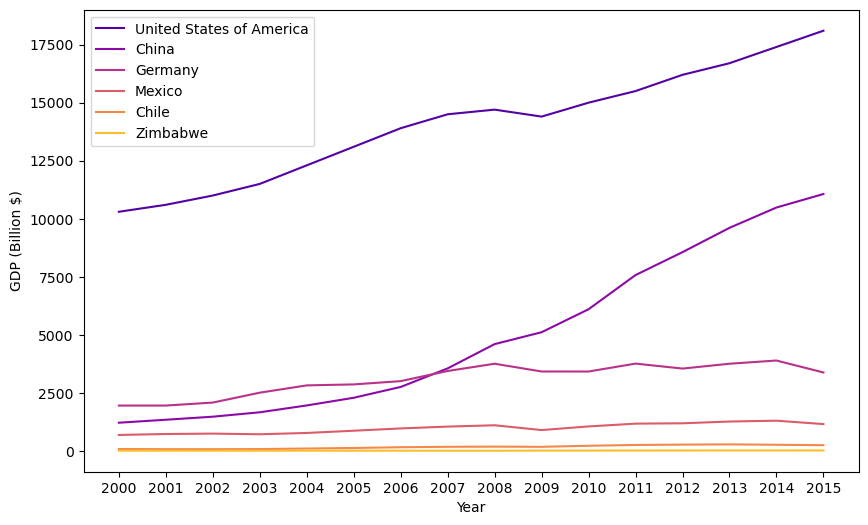

In [193]:
#Plotting the GDP change over 15 years for each country

plt.figure(figsize= (10, 6))
sns.lineplot(data = life_exp, x = 'Year', y = 'GDP', hue = 'Country', palette= 'plasma', hue_order= sorted_countries)
plt.ylabel('GDP (Billion $)')
plt.xticks(range(2000, 2016))
plt.xlabel('Year')
plt.legend()
plt.show()
plt.close()

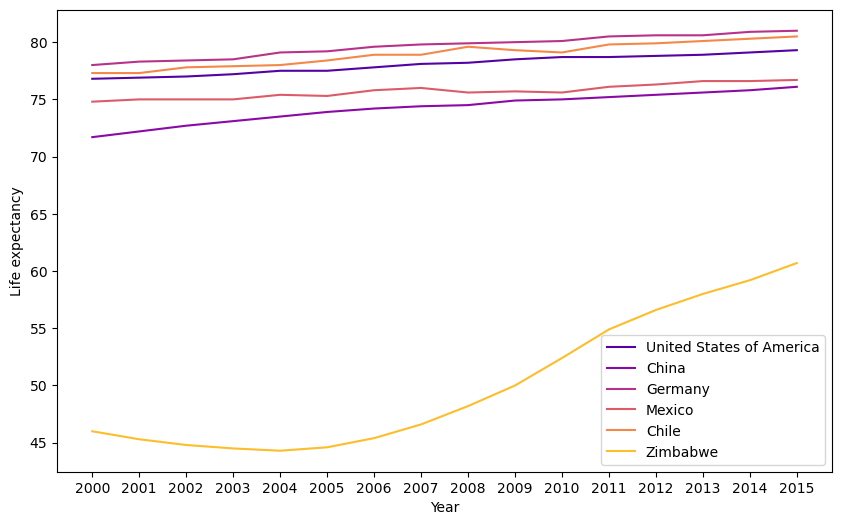

In [150]:
#Plotting how the life expectancy has changed over 15 years
plt.figure(figsize= (10, 6))
sns.lineplot(data = life_exp, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country', palette= 'plasma', hue_order= sorted_countries)
plt.ylabel('Life expectancy')
plt.xticks(range(2000, 2016))
plt.xlabel('Year')
plt.legend()
plt.show()
plt.close()

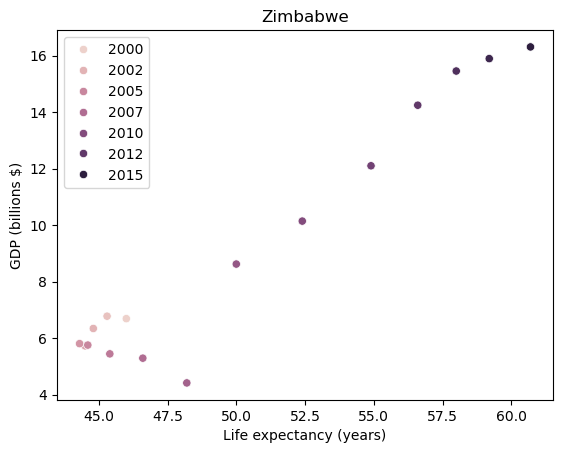

In [162]:
sns.scatterplot(data = life_exp, x = life_exp['Life expectancy at birth (years)'][life_exp.Country == 'Zimbabwe'], y = life_exp.GDP[life_exp.Country == 'Zimbabwe'], hue = 'Year')
plt.title('Zimbabwe')
plt.xlabel('Life expectancy (years)')
plt.ylabel('GDP (billions $)')
plt.legend()
plt.show()
plt.close()